In [4]:
import pandas as pd
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

In [5]:
spark = (
    SparkSession.builder.appName("proj-2-consumer")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .getOrCreate()
)

In [10]:
consumer_ud = spark.read.parquet("../data/tables/synthetic/consumer_user_details.parquet")
consumer = pd.read_csv("../data/tables/synthetic/tbl_consumer.csv")

In [11]:
# Split the consumer data into multiple columns
consumer[['name', 'address', 'state', 'postcode', 'gender', 'consumer_id']] = consumer['name|address|state|postcode|gender|consumer_id'].str.split('|', expand=True)
consumer = consumer.drop(columns=['name|address|state|postcode|gender|consumer_id'])

# Convert consumer_ud from spark to pandas
consumer_ud_pd = consumer_ud.toPandas()

# Convert consumer_id to the same type
consumer['consumer_id'] = consumer['consumer_id'].astype(str)
consumer_ud_pd['consumer_id'] = consumer_ud_pd['consumer_id'].astype(str)

# Combine all consumer data into one dataframe
consumer_df = pd.merge(consumer, consumer_ud_pd, on='consumer_id', how='left')
consumer_df.head()

,name,address,state,postcode,gender,consumer_id,user_id
0,Yolanda Williams,413 Haney Gardens Apt. 742,WA,6935,Female,1195503,1
1,Mary Smith,3764 Amber Oval,NSW,2782,Female,179208,2
2,Jill Jones MD,40693 Henry Greens,NT,862,Female,1194530,3
3,Lindsay Jimenez,00653 Davenport Crossroad,NSW,2780,Female,154128,4
4,Rebecca Blanchard,9271 Michael Manors Suite 651,WA,6355,Female,712975,5


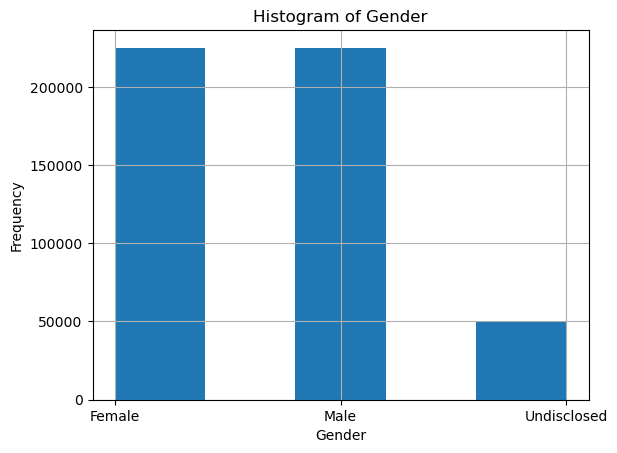

In [12]:
consumer_df['gender'].hist(bins=5)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Histogram of Gender')
plt.show()

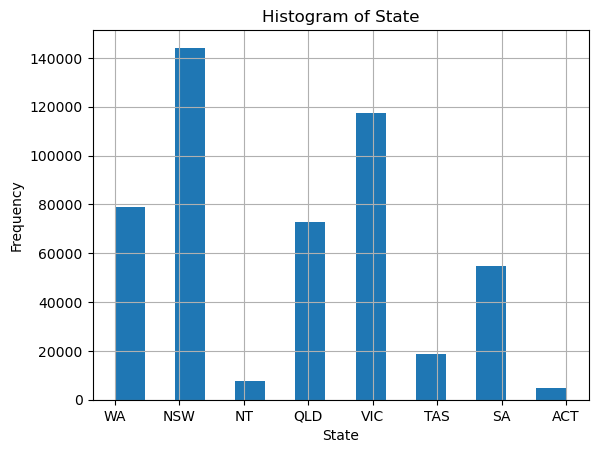

In [18]:
consumer_df['state'].hist(bins=15)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Histogram of State')
plt.show()